In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
training_data = pd.read_csv("SalaryData_Train.csv")
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# **EDA**

In [7]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [24]:
#Encoding
le = LabelEncoder()
training_data['Salary'] = le.fit_transform(training_data['Salary'])
training_data.iloc[:,0:9] =training_data.iloc[:,0:9].apply(LabelEncoder().fit_transform)
training_data['native'] = le.fit_transform(training_data['native'])
test_data['Salary'] = le.fit_transform(test_data['Salary'])
test_data.iloc[:,0:9] =test_data.iloc[:,0:9].apply(LabelEncoder().fit_transform)
test_data['native'] = le.fit_transform(test_data['native'])

In [25]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,40,37,0
1,21,2,11,8,2,4,0,4,1,0,0,50,37,0
2,11,1,7,11,2,10,0,4,1,0,0,40,37,1
3,27,2,15,9,2,6,0,2,1,7688,0,40,37,1
4,17,2,0,5,4,7,1,4,1,0,0,30,37,0


In [22]:
training_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,2174,0,40,United-States,0
1,33,4,9,12,2,3,0,4,1,0,0,13,United-States,0
2,21,2,11,8,0,5,1,4,1,0,0,40,United-States,0
3,36,2,1,6,2,5,0,2,1,0,0,40,United-States,0
4,11,2,9,12,2,9,5,2,0,0,0,40,Cuba,0


<Axes: xlabel='Salary', ylabel='count'>

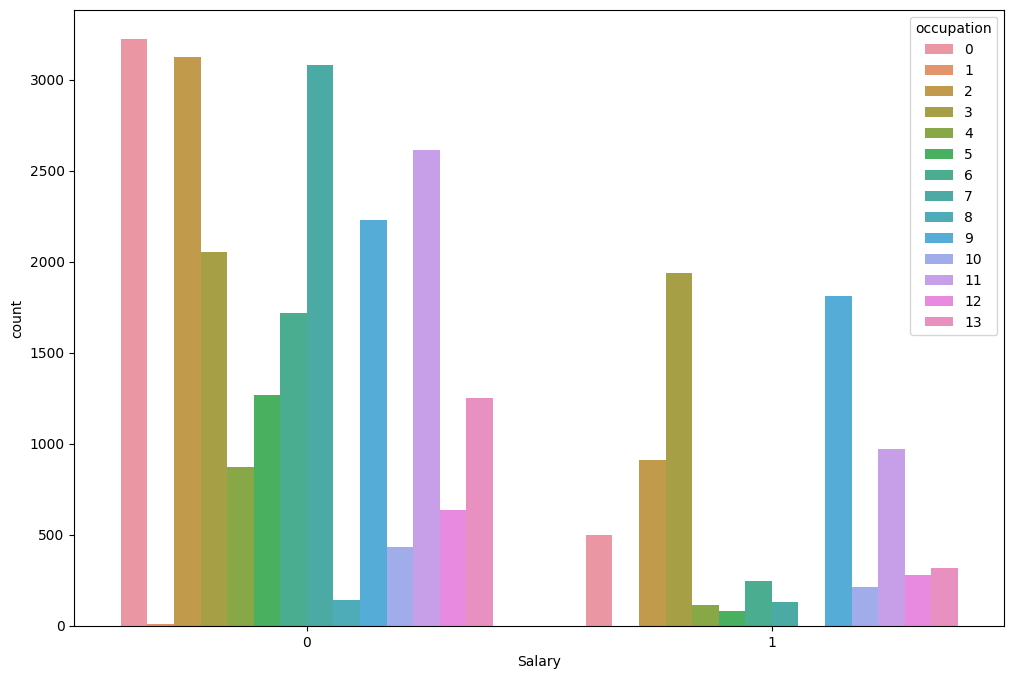

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue = training_data['occupation'])

# **Model Building**

In [27]:
# training data
x_train = training_data.drop(labels= 'Salary', axis = 1)
y_train = training_data[['Salary']]

In [28]:
# testing data
x_test = test_data.drop(labels='Salary',axis = 1)
y_test = test_data['Salary']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
x = cv.fit_transform(x_train)

In [32]:
print(x)

  (0, 0)	1
  (1, 12)	1
  (2, 3)	1
  (3, 4)	1
  (4, 6)	1
  (5, 8)	1
  (6, 10)	1
  (7, 9)	1
  (8, 11)	1
  (9, 1)	1
  (10, 2)	1
  (11, 5)	1
  (12, 7)	1


In [33]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [35]:
clf.fit(x_train,y_train)

MultinomialNB()

In [36]:
ypred = clf.predict(x_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# Gaussian Naive Bayes

In [38]:
# training model
train_model = gb()
train_model.fit(x_train,y_train)

GaussianNB()

In [39]:
y_train_pred = train_model.predict(x_train)

In [40]:
accuracy_score(y_train,y_train_pred)

0.7953317197705646

In [41]:
# testing model
y_test_pred = train_model.predict(x_test)

In [42]:
accuracy_score(y_test,y_test_pred)

0.7946879150066402